## Data Cleaning and Preparation

In [1]:
#Handling missing data
import pandas as pd
import numpy as np

string_data = pd.Series(['advark', 'artwork', np.nan, 'avocado'])
string_data.isnull() 
#To drop the nan value, you can use string_data.dropna()
#To fill with a value, use string_data.fillna('not_available')
#To replace values, use data.replace('advark', string_to_use)

0    False
1    False
2     True
3    False
dtype: bool

In [2]:
#Renaming axis indexes
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
     index=['Ohio', 'Colorado', 'New York'],
     columns=['one', 'two', 'three', 'four'])

print(data)
transform = lambda x: x[:4].upper()
print(data.index.map(transform))

data.index = data.index.map(transform)
print(data)

data.rename(index=str.title, columns=str.upper)

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
New York    8    9     10    11
Index(['OHIO', 'COLO', 'NEW '], dtype='object')
      one  two  three  four
OHIO    0    1      2     3
COLO    4    5      6     7
NEW     8    9     10    11


,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


In [3]:
#Detecting and filtering outliers
data = pd.DataFrame(np.random.randn(1000, 4))
data.describe()
#to select all rows having a value exceeding 3 or -3
data[(np.abs(data) > 3).any(1)]
#To cap the values outside of this range, use code below
data[np.abs(data)>3] = np.sign(data) * 3 #np.sign produces 1 or -1 values based on whether the values in data are +ve or -ve
print(data.head(10))

          0         1         2         3
0 -0.648031 -3.000000 -0.410992  2.326260
1  1.016970 -0.310684  0.183428 -1.104781
2 -1.068649  0.643053  0.281228  1.384415
3 -2.099332  1.733300  2.076814  0.281058
4 -0.226451  1.917575 -0.671023  0.890295
5 -0.916412  1.052243  0.728204 -0.817965
6  1.360353  0.634727  0.183772 -0.654906
7 -0.830262  0.880425  0.660450  0.431217
8  0.765082 -0.201972  1.347531 -1.234875
9  0.028331  0.732554 -0.271955  1.167467


In [4]:
#String object methods
val = 'a,b,d,s,  g'
print(val.split(','))
pieces = [x.strip() for x in val.split(',')] #This neglects the space before g
print(pieces)

['a', 'b', 'd', 's', '  g']
['a', 'b', 'd', 's', 'g']


## Data Wrangling: Join, Combine and Reshape

In [5]:
#Hierarchical Indexing: enables you to have multiple index levels on an axis
data = pd.Series(np.random.randn(9),
     index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
     [1, 2, 3, 1, 3, 1, 2, 2, 3]])
print(data, '\n')
print(data.index, '\n')
print(data.unstack()) #to reverse this data.unstack().stack()

a  1   -0.503419
   2    0.043398
   3   -0.655585
b  1   -1.885710
   3   -0.194807
c  1   -0.927766
   2   -1.246814
d  2    0.054338
   3    0.631676
dtype: float64 

MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 2, 0, 2, 0, 1, 1, 2]]) 

          1         2         3
a -0.503419  0.043398 -0.655585
b -1.885710       NaN -0.194807
c -0.927766 -1.246814       NaN
d       NaN  0.054338  0.631676


In [6]:
#Combining and merging datasets
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
    'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
    'data2': range(3)})
merged_df = pd.merge(df1,df2, on='key', how='left')
print(df1)
print(df2,'\n')

print(merged_df)

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6
  key  data2
0   a      0
1   b      1
2   d      2 

  key  data1  data2
0   b      0    1.0
1   b      1    1.0
2   a      2    0.0
3   c      3    NaN
4   a      4    0.0
5   a      5    0.0
6   b      6    1.0


In [7]:
#join() instance can also be used for merging by index to combine dataframe objects having similar or same indexes but
#non-overlapping columns

left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
     index=['a', 'c', 'e'],
     columns=['Ohio', 'Nevada'])
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
     index=['b', 'c', 'd', 'e'],
     columns=['Missouri', 'Alabama'])
#with merge command
print(pd.merge(left2, right2,how='outer',left_index=True, right_index=True), '\n')
#with join
left2.join(right2, how='outer')


   Ohio  Nevada  Missouri  Alabama
a   1.0     2.0       NaN      NaN
b   NaN     NaN       7.0      8.0
c   3.0     4.0       9.0     10.0
d   NaN     NaN      11.0     12.0
e   5.0     6.0      13.0     14.0 



,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [8]:
#To combine along an axis
arr = np.arange(12).reshape((3, 4))
np.concatenate([arr,arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

## Plotting and Visualization

<IPython.core.display.Javascript object>


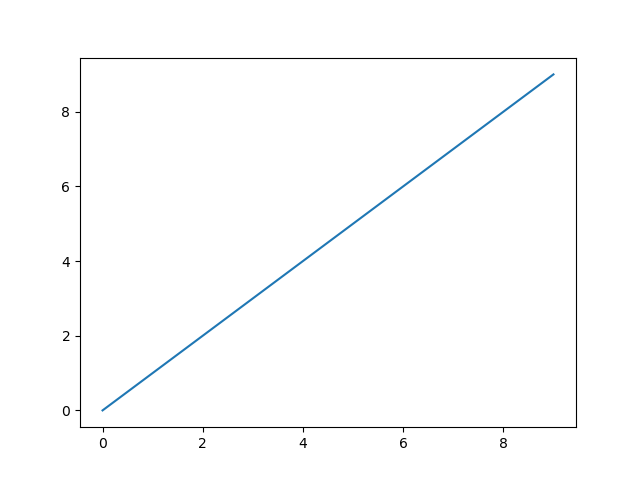

In [11]:
 #this enables you to interact with your plots in jupyter notebook
%matplotlib notebook
import matplotlib.pyplot as plt
data = np.arange(10)
plt.plot(data)

<IPython.core.display.Javascript object>


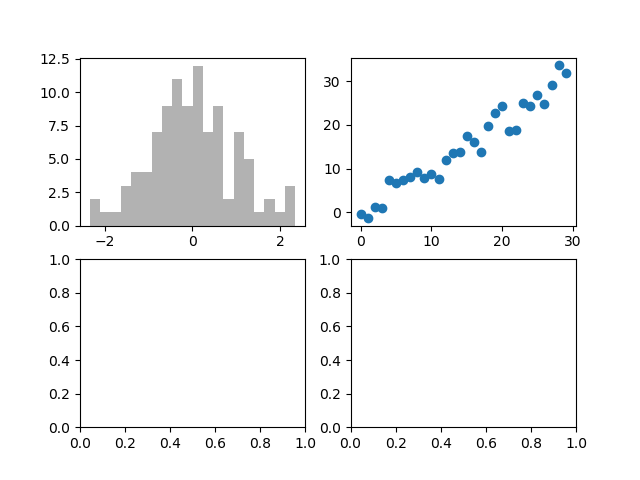

<IPython.core.display.Javascript object>


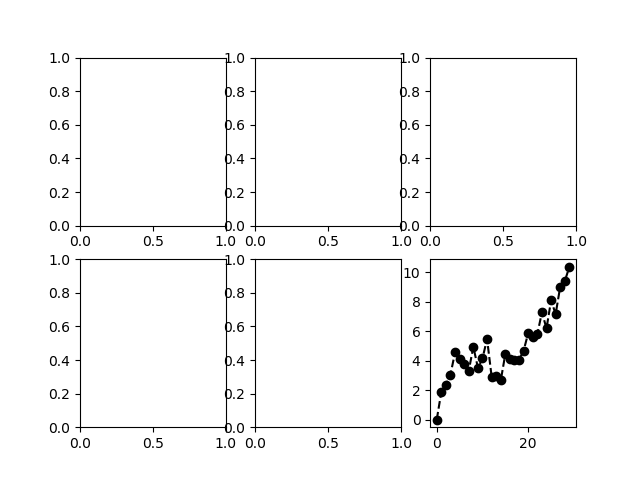

In [13]:
#figures and subplots
fig = plt.figure() #creates new figures
ax1 = fig.add_subplot(2,2,1) #figure creates four plots in total and 1 selects the first figure
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
#ax2.axis('off')

#a more convenient way of doing same task is given below
fig, axes = plt.subplots(2,3) #2 rows, 3 columns

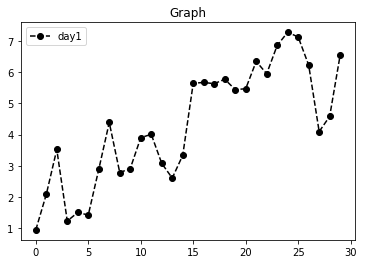

In [23]:
%matplotlib inline
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--',label='day1') #can also be written as plt(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')
plt.title('Graph')
plt.legend()

In [30]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
     'key2' : ['one', 'two', 'one', 'two', 'one'],
     'data1' : np.random.randn(5),
     'data2' : np.random.randn(5)})
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one    -0.197631
      two    -0.687695
b     one     0.207556
      two     0.598144
Name: data1, dtype: float64